In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [10]:
df = pd.read_csv("Speed Dating Data.csv")

In [11]:
attributes = df[['attr','sinc','intel','fun','like','int_corr', 'match']]

In [12]:
attributes.describe()

,attr,sinc,intel,fun,like,int_corr,match
count,8176.000000,8101.000000,8082.000000,8028.000000,8138.000000,8220.000000,8378.000000
mean,6.189995,7.175164,7.368597,6.400598,6.134087,0.196010,0.164717
std,1.950169,1.740315,1.550453,1.953702,1.841285,0.303539,0.370947
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.830000,0.000000
25%,5.000000,6.000000,6.000000,5.000000,5.000000,-0.020000,0.000000
50%,6.000000,7.000000,7.000000,7.000000,6.000000,0.210000,0.000000
75%,8.000000,8.000000,8.000000,8.000000,7.000000,0.430000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,0.910000,1.000000


In [13]:
attributes.isnull().sum()

attr        202
sinc        277
intel       296
fun         350
like        240
int_corr    158
match         0
dtype: int64

In [14]:
attributes_clean = attributes.dropna()

In [15]:
attributes_clean.describe()

,attr,sinc,intel,fun,like,int_corr,match
count,7739.000000,7739.000000,7739.000000,7739.000000,7739.00000,7739.000000,7739.000000
mean,6.181794,7.172955,7.357281,6.399470,6.13118,0.196582,0.170306
std,1.947752,1.742623,1.548835,1.946785,1.83037,0.304227,0.375926
min,0.000000,0.000000,0.000000,0.000000,0.00000,-0.830000,0.000000
25%,5.000000,6.000000,6.000000,5.000000,5.00000,-0.015000,0.000000
50%,6.000000,7.000000,7.000000,7.000000,6.00000,0.210000,0.000000
75%,8.000000,8.000000,8.000000,8.000000,7.00000,0.430000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.00000,0.910000,1.000000


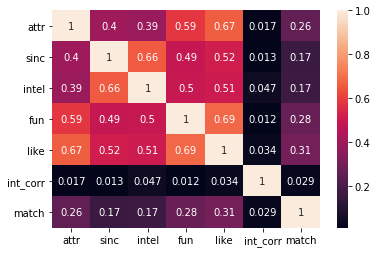

In [18]:
sns.heatmap(attributes_clean.corr(), annot=True)

In [22]:
def cross_validation(X, y, model):
    '''
    K-Folds Cross-Validation
    '''
    X, y = np.array(X), np.array(y)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []
    results_precision = [] # added
    results_recall = [] # added
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)
        results.append(accuracy_score(y_test, y_hat))
        results_precision.append(precision_score(y_test, y_hat)) # added 
        results_recall.append(recall_score(y_test, y_hat)) # added 
        
    return np.mean(results), np.std(results), np.mean(results_precision), np.mean(results_recall)



In [26]:
model_lr = LogisticRegression()

model_svc = svm.SVC(kernel='rbf', C=2)

model_nn = MLPClassifier(max_iter=10000, early_stopping=True, learning_rate="adaptive", 
                      hidden_layer_sizes=(100,), learning_rate_init=1e-1)

model_rf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=6)

model_nb = GaussianNB()

model_nc = KNeighborsClassifier(5)

In [27]:
features = attributes_clean.drop(["match"], axis=1)
label = attributes_clean[["match"]]

In [28]:
features

,attr,sinc,intel,fun,like,int_corr
0,6.0,9.0,7.0,7.0,7.0,0.14
1,7.0,8.0,7.0,8.0,7.0,0.54
2,5.0,8.0,9.0,8.0,7.0,0.16
3,7.0,6.0,8.0,7.0,7.0,0.61
4,5.0,6.0,7.0,7.0,6.0,0.21
...,...,...,...,...,...,...
8373,3.0,5.0,5.0,5.0,2.0,0.64
8374,4.0,6.0,8.0,4.0,4.0,0.71
8375,4.0,7.0,8.0,8.0,6.0,-0.46
8376,4.0,6.0,5.0,4.0,5.0,0.62


In [29]:
score_lr = cross_validation(features, label.to_numpy().reshape(features.shape[0]), 
                            model_lr)

score_svc = cross_validation(features, label.to_numpy().reshape(features.shape[0]), 
                            model_svc)

score_nn = cross_validation(features, label.to_numpy().reshape(features.shape[0]), 
                            model_nn)

score_rf = cross_validation(features, label.to_numpy().reshape(features.shape[0]), 
                            model_rf)

score_nb = cross_validation(features, label.to_numpy().reshape(features.shape[0]), 
                            model_nb)

score_nc = cross_validation(features, label.to_numpy().reshape(features.shape[0]), 
                            model_nc)

print(f"Score Logistic Regression: Mean Accuracy: {round(score_lr[0],2)}, Std: {round(score_lr[1],3)}")
print(f"Score Logistic Regression: Mean Precision: {round(score_lr[2],2)}")
print(f"Score Logistic Regression: Mean Recall: {round(score_lr[3],2)}")
print("\n --- \n")

print(f"Score Support Vector Classifier: Mean Accuracy: {round(score_svc[0],2)}, Std: {round(score_svc[1],3)}")
print(f"Score Support Vector Classifier: Mean Precision: {round(score_svc[2],2)}")
print(f"Score Support Vector Classifier: Mean Recall: {round(score_svc[3],2)}")
print("\n --- \n")

print(f"Score Multi Layer Perceptron (1 Hidden Layer): Mean Accuracy: {round(score_nn[0],2)}, Std: {round(score_nn[1],3)}")
print(f"Score Multi Layer Perceptron (1 Hidden Layer): Mean Precision:  {round(score_nn[2],2)}")
print(f"Score Multi Layer Perceptron (1 Hidden Layer): Mean Recall: {round(score_nn[3],2)}")
print("\n --- \n")

print(f"Random Forest: Mean Accuracy: {round(score_rf[0],2)}, Std: {round(score_rf[1],3)}")
print(f"Random Forest: Mean Precision:  {round(score_rf[2],2)}")
print(f"Random Forest: Mean Recall: {round(score_rf[3],2)}")
print("\n --- \n")

print(f"Naive Bayes: Mean Accuracy: {round(score_nb[0],2)}, Std: {round(score_nb[1],3)}")
print(f"Naive Bayes: Mean Precision: {round(score_nb[2],2)}")
print(f"Naive Bayes: Mean Recall: {round(score_nb[3],2)}")
print("\n --- \n")

print(f"Nearest Neighbor: Mean Accuracy: {round(score_nc[0],2)}, Std: {round(score_nc[1],3)}")
print(f"Nearest Neighbor: Mean Precision: {round(score_nc[2],2)}")
print(f"Nearest Neighbor: Mean Recall: {round(score_nc[3],2)}")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Fram

Score Logistic Regression: Mean Accuracy: 0.83, Std: 0.008
Score Logistic Regression: Mean Precision: 0.46
Score Logistic Regression: Mean Recall: 0.08

 --- 

Score Support Vector Classifier: Mean Accuracy: 0.83, Std: 0.009
Score Support Vector Classifier: Mean Precision: 0.0
Score Support Vector Classifier: Mean Recall: 0.0

 --- 

Score Multi Layer Perceptron (1 Hidden Layer): Mean Accuracy: 0.83, Std: 0.009
Score Multi Layer Perceptron (1 Hidden Layer): Mean Precision:  0.15
Score Multi Layer Perceptron (1 Hidden Layer): Mean Recall: 0.0

 --- 

Random Forest: Mean Accuracy: 0.82, Std: 0.011
Random Forest: Mean Precision:  0.39
Random Forest: Mean Recall: 0.09

 --- 

Naive Bayes: Mean Accuracy: 0.74, Std: 0.011
Naive Bayes: Mean Precision: 0.34
Naive Bayes: Mean Recall: 0.56

 --- 

Nearest Neighbor: Mean Accuracy: 0.81, Std: 0.012
Nearest Neighbor: Mean Precision: 0.37
Nearest Neighbor: Mean Recall: 0.17
